# Model-3

In [1]:
import tensorflow as tf
import numpy as np
from dataset import Dataset, load_datasets
from config import get_dataset_path
from layers import *
from networks import *
from model import Model
from dbase import build_dbase
from evaluation import print_accuracy, plot_search_results

In [4]:
tr_data_path  = get_dataset_path("train/5557_300_128_128_1_uint8_aug2.npy")
va_data_path  = get_dataset_path("valid/550_300_128_128_1_uint8_aug2.npy")
model_path    = "models/003-v4/"

## Dataset

In [5]:
%%time
tr_dataset, va_dataset = load_datasets(tr_data_path, va_data_path)
print('-'*50)

/netforge/datasets/private/roman/coins/2017-11-29/datasets/train/5557_300_128_128_1_uint8_aug2.npy:
 [5557, 300, 128, 128, 1] uint8
/netforge/datasets/private/roman/coins/2017-11-29/datasets/valid/550_300_128_128_1_uint8_aug2.npy:
 [550, 300, 128, 128, 1] uint8
--------------------------------------------------
CPU times: user 640 ms, sys: 1min 15s, total: 1min 15s
Wall time: 2min 54s


## Build 

In [6]:
%%time
out_dims       = 100
margin         = .5
network        = simple_conv

# v1: d=300 m=1 s=15k  lr=1e-6 tr_acc=87.3
# v2: d=300 m=3 s=15k  lr=1e-4 tr_acc=93.3
# v3: d=300 m=5 s=30k  lr=1e-4 tr_acc=97.3
# v4: d=100 m=5 s=175k lr=1e-4 tr_acc=98.0 va_acc=99.5
# v5: d=150 m=5 s=150k lr=1e-4 tr_acc= .. va_acc= ..

acc_batch_size = 300
image_shape    = list(tr_dataset.data.shape[-3:])
model          = Model(image_shape, out_dims, acc_batch_size)
model.build(network)

CPU times: user 5.8 s, sys: 0 ns, total: 5.8 s
Wall time: 5.97 s


## Train

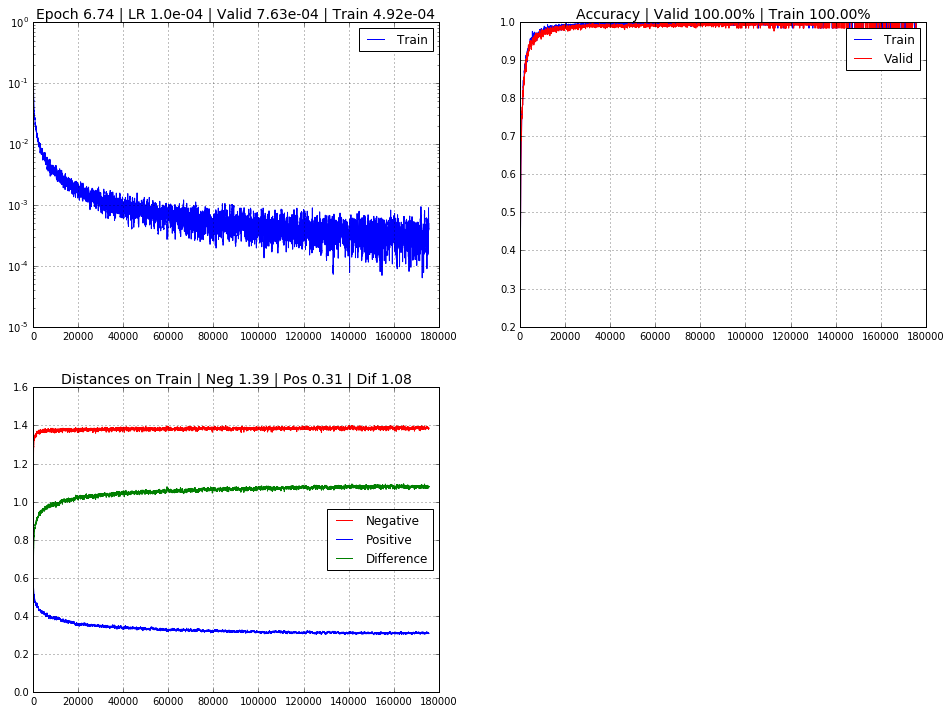

--------------------------------------------------
CPU times: user 45min 30s, sys: 5min 26s, total: 50min 56s
Wall time: 52min 1s


In [265]:
%%time
model.train(
    step_num   = 150000, 
    batch_size = 64,
    lr         = 1e-4, 
    log_every  = 100,
    tr_dataset = tr_dataset,
    va_dataset = va_dataset,
    margin     = margin,
    log_scale  = True)

model.save(model_path)
print('-'*50)

## Database

In [294]:
%%time
ethalons  = va_dataset.get_ethalons()  # tr_dataset va_dataset
augmented = va_dataset.get_augmented() # get_augmented() get_ethalons()

dbase     = build_dbase(model, ethalons, augmented)
print('-'*50)

Ethalons : [550, 128, 128, 1] float32
Augmented: [550, 128, 128, 1] float32
Database : [550, 100] float64
--------------------------------------------------
CPU times: user 408 ms, sys: 36 ms, total: 444 ms
Wall time: 399 ms


## Accuracy

In [295]:
%%time
print_accuracy(dbase, augmented, 5)

Database   : [550, 100]
Request    : [550, 128, 128, 1]
Performance: 2049 img/sec
--------------------------------------------------
Accuracy@1: 99.5%
Accuracy@2: 100.0%
Accuracy@3: 100.0%
Accuracy@4: 100.0%
Accuracy@5: 100.0%
--------------------------------------------------
CPU times: user 276 ms, sys: 32 ms, total: 308 ms
Wall time: 280 ms


## Search

Database   : [550, 100]
Request    : [550, 128, 128, 1]

Min distance: 0.11
Max distance: 0.76
Ave distance: 0.29


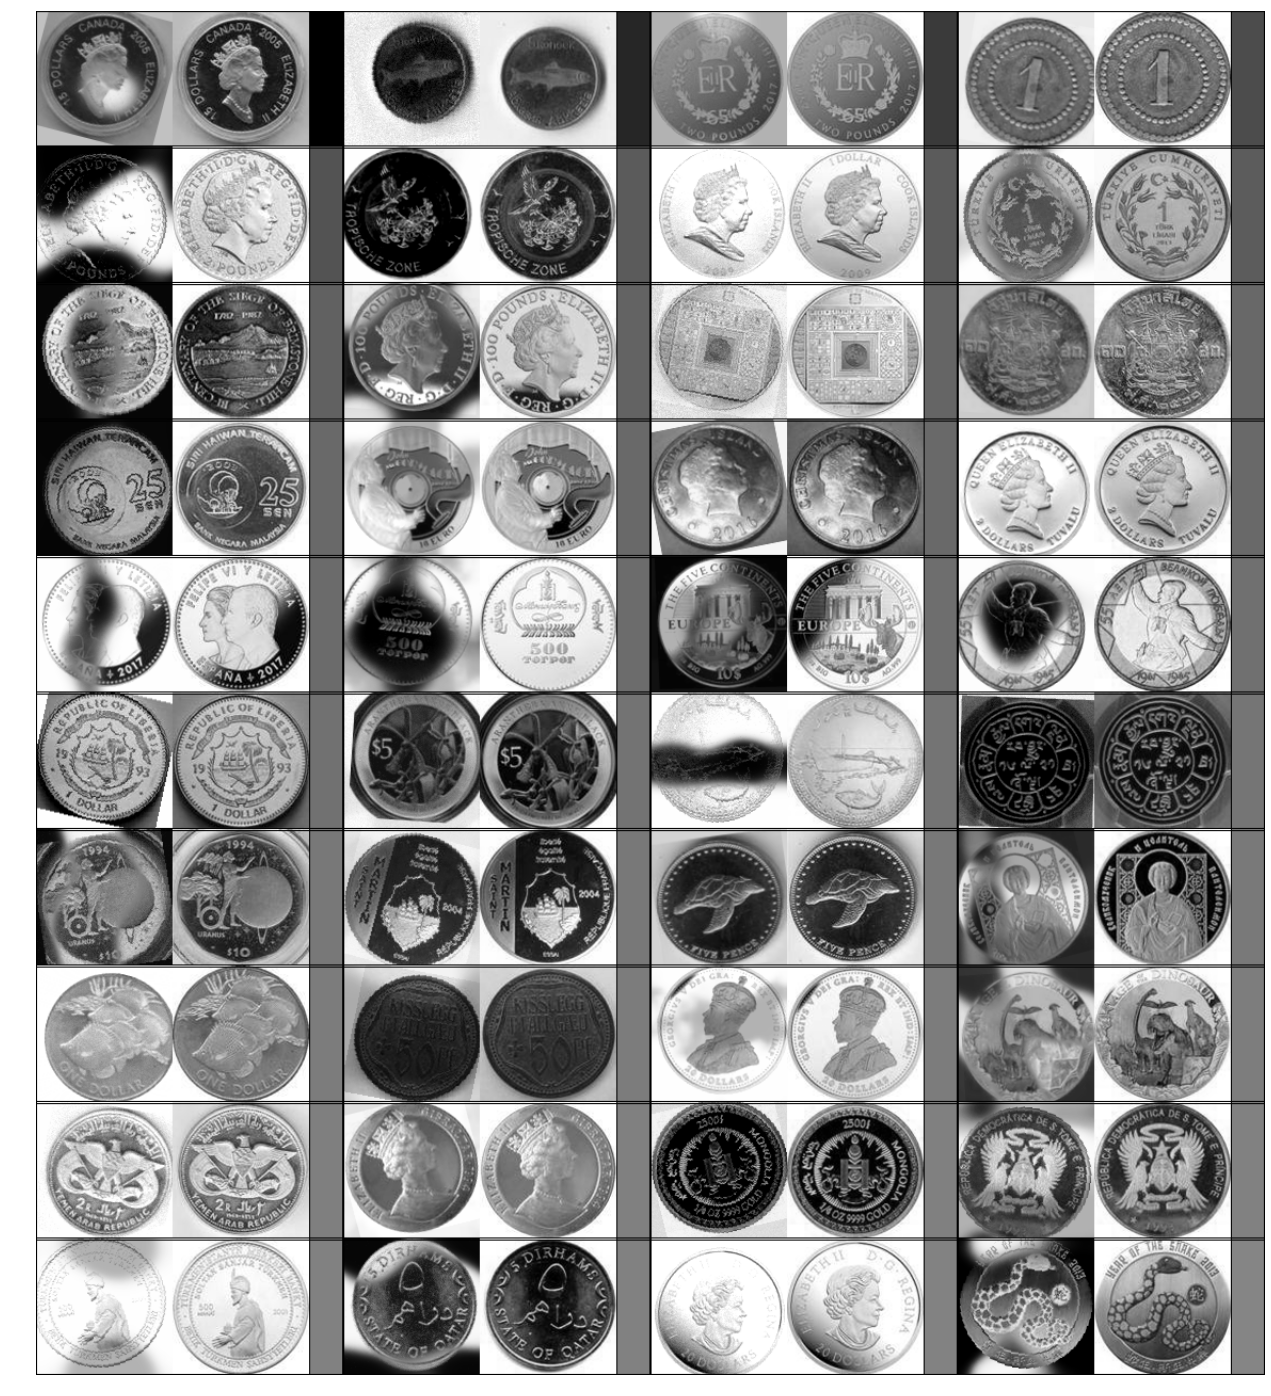

CPU times: user 2.68 s, sys: 176 ms, total: 2.86 s
Wall time: 2.65 s


In [298]:
%%time
#plot_search_results(dbase, augmented, num=550, cols=4, k=0, sort='asc', plot_limit=42)
plot_search_results(dbase, augmented, num=550, cols=4, k=0, sort='desc', plot_limit=42)

## Restore

In [269]:
%time
model.restore(model_path)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.5 µs
INFO:tensorflow:Restoring parameters from models/003-v4/


INFO:tensorflow:Restoring parameters from models/003-v4/
